In [1]:
import os

# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk
from nltk.corpus import stopwords

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
train_df = pd.read_csv(r"/content/dual-stage-toxic-comment-detection-system/raw_data/jigsaw-toxic-comment-classification-challenge/train/train.csv")
test_df = pd.read_csv(r"/content/dual-stage-toxic-comment-detection-system/raw_data/jigsaw-toxic-comment-classification-challenge/test/test.csv")

In [6]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
sum_labels=train_df.iloc[:,2:].sum()
print(sum_labels)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


### Creation of Label feature

In [8]:
row_sum=train_df.iloc[:,2:].sum(axis=1)
train_df['Label']=(row_sum==0)

In [9]:
print(train_df.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Label            0
dtype: int64


In [10]:
print(train_df[train_df['Label'] == False])

                      id                                       comment_text  \
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
12      0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
16      0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
42      001810bf8c45bf5f  You are gay or antisemmitian? \n\nArchangel WH...   
43      00190820581d90ce           FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!   
...                  ...                                                ...   
159494  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
159514  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
159541  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
159546  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
159554  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

        toxic  severe_toxic  obscene  threat  insul

In [11]:
print(test_df.isnull().sum())

id              0
comment_text    0
dtype: int64


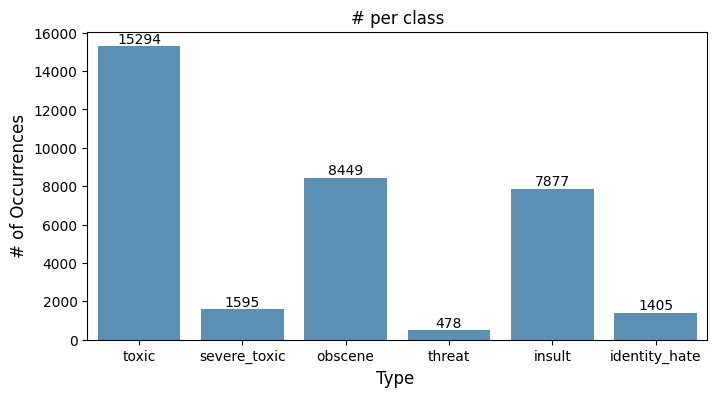

In [12]:
#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x=sum_labels.index, y=sum_labels.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = sum_labels.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

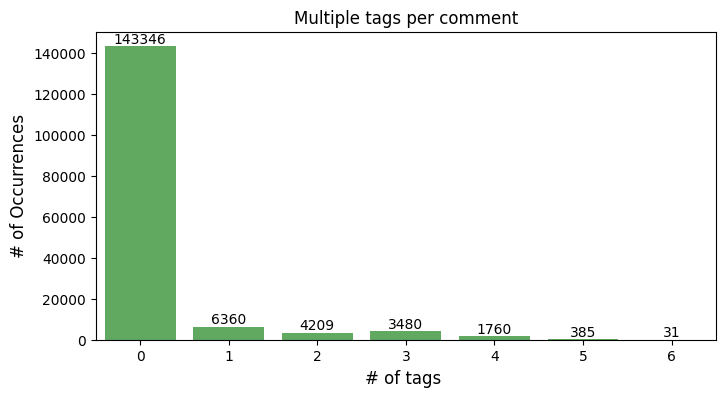

In [13]:
color = sns.color_palette()

x=row_sum.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [14]:
temp_df=train_df.iloc[:,2:-1]

# https://pandas.pydata.org/pandas-docs/stable/style.html
def highlight_min(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

#Crosstab
# Since technically a crosstab between all 6 classes is impossible to vizualize, lets take a
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
out = out.style.apply(highlight_min,axis=0)
out

In [15]:
stopwords = set(stopwords.words('english'))

In [16]:
combined_df = pd.concat([train_df.iloc[:, :2], test_df.iloc[:, :2]], axis=0)
df = combined_df.reset_index(drop=True)

In [17]:
print(combined_df)

                      id                                       comment_text
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[312735 rows x 2 columns]


In [18]:
print(df)

                      id                                       comment_text
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...
...                  ...                                                ...
312730  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
312731  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
312732  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
312733  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
312734  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[312735 rows x 2 columns]


In [19]:
import string

# Feature Engineering

In [20]:
# Indirect Textual Features

# Count sentences based on newline characters in each comment
df['sentence_count'] = df['comment_text'].apply(lambda text: str(text).count('\n') + 1)

# Count total words in each comment
df['word_count'] = df['comment_text'].apply(lambda text: len(str(text).split()))

# Count unique words in each comment
df['unique_word_count'] = df['comment_text'].apply(lambda text: len(set(str(text).split())))

# Count total letters (characters) in each comment
df['letter_count'] = df['comment_text'].apply(lambda text: len(str(text)))

# Count punctuation marks in each comment
df['punctuation_count'] = df['comment_text'].apply(
    lambda text: sum(1 for char in str(text) if char in string.punctuation)
)

# Count uppercase words in each comment
df['uppercase_word_count'] = df['comment_text'].apply(
    lambda text: sum(1 for word in str(text).split() if word.isupper())
)

# Count title-case words in each comment
df['titlecase_word_count'] = df['comment_text'].apply(
    lambda text: sum(1 for word in str(text).split() if word.istitle())
)

# Count stopwords in each comment
df['stopword_count'] = df['comment_text'].apply(
    lambda text: sum(1 for word in str(text).lower().split() if word in stopwords)
)

df['avg_word_length'] = df['comment_text'].apply(
    lambda text: np.mean([len(word) for word in str(text).split()]) if str(text).split() else 0
)


In [21]:
print(df)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
312730  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
312731  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
312732  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
312733  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
312734  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [22]:
# Calculating the percentage of unique words per comment
df['unique_word_ratio'] = (df['unique_word_count'] / df['word_count']) * 100

# Calculating the percentage of punctuation marks per comment
df['punctuation_ratio'] = (df['punctuation_count'] / df['word_count']) * 100


In [23]:
# Splitting dataset into training and testing feature sets
train_data_features = df[:train_df.shape[0]].reset_index(drop=True)
test_data_features = df[train_df.shape[0]:].reset_index(drop=True)

print(train_data_features)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        sentence_count  word_count  unique_word_cou

In [24]:
print(test_data_features)

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
...                  ...                                                ...   
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [25]:
# Extracting labels from the training data
label_columns = train_df.iloc[:, 2:8].reset_index(drop=True)

print(label_columns)

        toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
159566      0             0        0       0       0              0
159567      0             0        0       0       0              0
159568      0             0        0       0       0              0
159569      0             0        0       0       0              0
159570      0             0        0       0       0              0

[159571 rows x 6 columns]


In [26]:
# Combining training features and labels into a single DataFrame
combined_training_data = pd.concat([train_data_features, label_columns], axis=1)

In [27]:
print(combined_training_data)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        sentence_count  word_count  unique_word_cou

# Text Preprocessing

In [28]:
import re

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

# Apply preprocessing
combined_training_data["clean_comment"] = train_df['comment_text'].apply(preprocess_text)
test_data_features['clean_comment'] = test_df['comment_text'].apply(preprocess_text)

In [29]:
print(combined_training_data)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        sentence_count  word_count  unique_word_cou

In [30]:
# Extract features and labels
X = combined_training_data.iloc[:, 2:].reset_index(drop=True)

print(X)

        sentence_count  word_count  unique_word_count  letter_count  \
0                    2          43                 41           264   
1                    1          17                 17           112   
2                    1          42                 39           233   
3                    5         113                 82           622   
4                    1          13                 13            67   
...                ...         ...                ...           ...   
159566               3          47                 44           295   
159567               3          18                 18            99   
159568               3          12                 12            81   
159569               1          25                 23           116   
159570               2          36                 32           189   

        punctuation_count  uppercase_word_count  titlecase_word_count  \
0                      10                     2                    11   
1

In [31]:
y = train_df["Label"]  # Binary classification (toxic vs. non-toxic)

print(y)

0         True
1         True
2         True
3         True
4         True
          ... 
159566    True
159567    True
159568    True
159569    True
159570    True
Name: Label, Length: 159571, dtype: bool


# Building the models

## Binary Classification Models

### Splitting of the dataset

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
text_column = 'clean_comment'

# Extract text
X_train_text = X_train[text_column]
X_val_text = X_val[text_column]

# Drop text column to keep only non-text features
X_train_other = X_train.drop(columns=[text_column,'toxic','severe_toxic','obscene','threat','insult','identity_hate'])
X_val_other = X_val.drop(columns=[text_column,'toxic','severe_toxic','obscene','threat','insult','identity_hate'])

### TF-IDF Vectors

In [34]:
# Convert text data into numerical vectors using TF-IDF
tfidf = TfidfVectorizer(max_features=15000, stop_words="english")
X_train_text_tfidf = tfidf.fit_transform(X_train_text)
X_val_text_tfidf = tfidf.transform(X_val_text)

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_other_scaled = scaler.fit_transform(X_train_other)
X_val_other_scaled = scaler.transform(X_val_other)

In [36]:
from scipy.sparse import hstack

X_train_combined = hstack([X_train_text_tfidf, X_train_other_scaled])
X_val_combined = hstack([X_val_text_tfidf, X_val_other_scaled])

### Baseline ML Models

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

In [38]:
X_test_text = test_data_features[text_column]
X_test_other = test_data_features.drop(columns=['id','comment_text',text_column])

In [39]:
# Transform test data using the same TF-IDF vectorizer
X_test_text_tfidf = tfidf.transform(X_test_text)

print(X_test_text_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2871854 stored elements and shape (153164, 15000)>
  Coords	Values
  (0, 862)	0.1438673847075989
  (0, 1426)	0.30162401370054653
  (0, 1615)	0.17711998293793982
  (0, 1716)	0.17014453548421063
  (0, 3319)	0.18259485209550166
  (0, 4090)	0.07283878056381603
  (0, 4907)	0.20517971438338814
  (0, 5947)	0.1389988011509787
  (0, 6077)	0.21519387183764394
  (0, 7114)	0.44097837997043643
  (0, 7411)	0.19517193525070714
  (0, 7745)	0.07188218723579354
  (0, 8030)	0.12516487283116962
  (0, 8700)	0.1435754924016713
  (0, 10232)	0.18892626806438229
  (0, 11353)	0.09857902041925318
  (0, 11502)	0.2692806734293441
  (0, 11549)	0.15535206642150387
  (0, 11990)	0.13482019012925325
  (0, 12197)	0.2063764660387031
  (0, 13330)	0.1058336730179398
  (0, 13408)	0.08451561358790177
  (0, 14025)	0.16867975381898792
  (0, 14515)	0.13230989994481496
  (0, 14529)	0.28288131952156725
  :	:
  (153162, 7085)	0.17140381147364678
  (153162, 7191)	0.12232

In [40]:
print(X_test_other)

        sentence_count  word_count  unique_word_count  letter_count  \
0                    1          72                 61           367   
1                    3          12                 11            50   
2                    5          12                 10            54   
3                    1          38                 30           205   
4                    1           7                  7            41   
...                ...         ...                ...           ...   
153159               2          10                 10            60   
153160               5          38                 32           198   
153161               9          64                 51           423   
153162               5          89                 66           502   
153163               2          26                 24           141   

        punctuation_count  uppercase_word_count  titlecase_word_count  \
0                      12                     0                     4   
1

In [41]:
X_test_other_scaled = scaler.transform(X_test_other)

In [42]:
X_test_combined = hstack([X_test_text_tfidf, X_test_other_scaled])

In [43]:
print(np.isnan(X_test_combined.data).sum())

2


In [44]:
from scipy.sparse import coo_matrix

# Convert to COO format if needed
X_coo = X_test_combined.tocoo()

# Find rows with NaNs
nan_mask = np.isnan(X_coo.data)
rows_with_nans = np.unique(X_coo.row[nan_mask])

# Get unique rows (since same row could have multiple NaNs)
unique_rows = np.unique(rows_with_nans)

print("Rows with NaN values:", unique_rows)
print("Total rows with NaNs:", len(unique_rows))

# Replace NaNs with 0
X_coo.data[np.isnan(X_coo.data)] = 0

# Convert back to CSR for efficient slicing & prediction
X_test_combined = X_coo.tocsr()

Rows with NaN values: [55142]
Total rows with NaNs: 1


In [45]:
print(np.isnan(X_test_combined.data).sum())

0


### Training the models

Training Logistic Regression...
Logistic Regression is fit to the training data
Validated the model
Accuracy of Logistic Regression 0.9556321478928403
classification_report of Logistic Regression               precision    recall  f1-score   support

       False       0.92      0.61      0.74      3245
        True       0.96      0.99      0.98     28670

    accuracy                           0.96     31915
   macro avg       0.94      0.80      0.86     31915
weighted avg       0.95      0.96      0.95     31915

confusion_matrix of Logistic Regression [[ 1992  1253]
 [  163 28507]]
Updated the Logistic Regression results


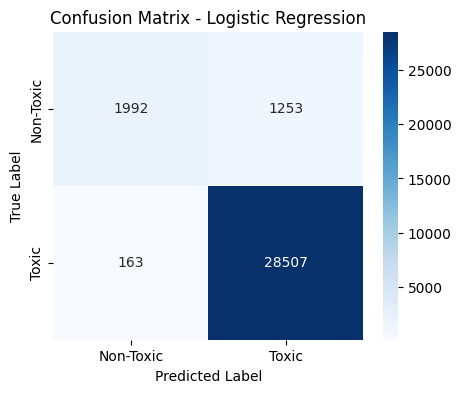

Logistic Regression Predictions done for test data
Training Naive Bayes...
Naive Bayes is fit to the training data
Validated the model
Accuracy of Naive Bayes 0.9470781764060786
classification_report of Naive Bayes               precision    recall  f1-score   support

       False       0.94      0.51      0.66      3245
        True       0.95      1.00      0.97     28670

    accuracy                           0.95     31915
   macro avg       0.95      0.75      0.82     31915
weighted avg       0.95      0.95      0.94     31915

confusion_matrix of Naive Bayes [[ 1655  1590]
 [   99 28571]]
Updated the Naive Bayes results


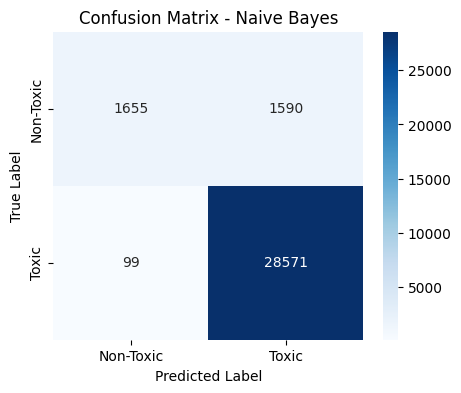

Naive Bayes Predictions done for test data
Training Random Forest...
Random Forest is fit to the training data
Validated the model
Accuracy of Random Forest 0.9540968196772678
classification_report of Random Forest               precision    recall  f1-score   support

       False       0.90      0.62      0.73      3245
        True       0.96      0.99      0.97     28670

    accuracy                           0.95     31915
   macro avg       0.93      0.80      0.85     31915
weighted avg       0.95      0.95      0.95     31915

confusion_matrix of Random Forest [[ 2004  1241]
 [  224 28446]]
Updated the Random Forest results


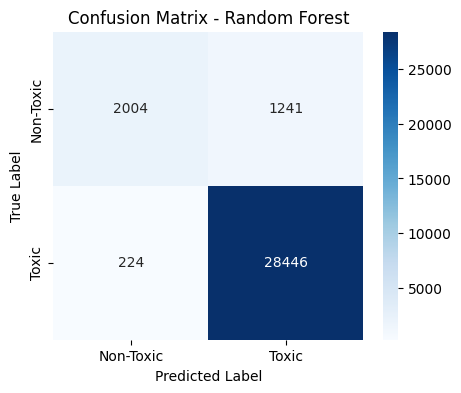

Random Forest Predictions done for test data
Training XGBoost...
XGBoost is fit to the training data
Validated the model
Accuracy of XGBoost 0.9545041516528279
classification_report of XGBoost               precision    recall  f1-score   support

       False       0.91      0.61      0.73      3245
        True       0.96      0.99      0.98     28670

    accuracy                           0.95     31915
   macro avg       0.93      0.80      0.85     31915
weighted avg       0.95      0.95      0.95     31915

confusion_matrix of XGBoost [[ 1994  1251]
 [  201 28469]]
Updated the XGBoost results


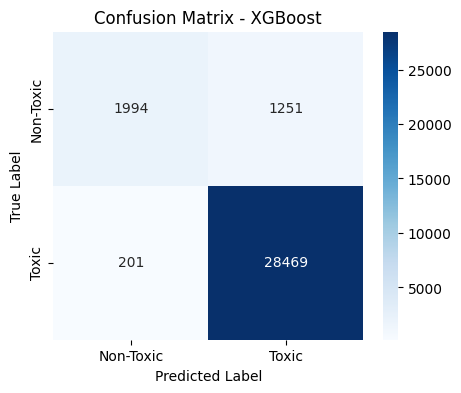

XGBoost Predictions done for test data


In [46]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_combined, y_train)
    print(f"{model_name} is fit to the training data")
    y_val_pred = model.predict(X_val_combined)
    print("Validated the model")
    # Compute evaluation metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Accuracy of {model_name}", accuracy)
    classification_rep = classification_report(y_val, y_val_pred)
    print(f"classification_report of {model_name}", classification_rep)
    conf_matrix = sk_confusion_matrix(y_val, y_val_pred)
    print(f"confusion_matrix of {model_name}", conf_matrix)

    # Store results
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep,
        "confusion_matrix": conf_matrix
    }
    print(f"Updated the {model_name} results")
    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Toxic", "Toxic"], yticklabels=["Non-Toxic", "Toxic"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    test_data_features[f"predicted_{model_name.replace(' ', '_')}"] = model.predict(X_test_combined)

    print(f"{model_name} Predictions done for test data")

### Results

In [82]:
print(results)

{'Logistic Regression': {'accuracy': 0.9556321478928403, 'classification_report': '              precision    recall  f1-score   support\n\n       False       0.92      0.61      0.74      3245\n        True       0.96      0.99      0.98     28670\n\n    accuracy                           0.96     31915\n   macro avg       0.94      0.80      0.86     31915\nweighted avg       0.95      0.96      0.95     31915\n', 'confusion_matrix': array([[ 1992,  1253],
       [  163, 28507]])}, 'Naive Bayes': {'accuracy': 0.9470781764060786, 'classification_report': '              precision    recall  f1-score   support\n\n       False       0.94      0.51      0.66      3245\n        True       0.95      1.00      0.97     28670\n\n    accuracy                           0.95     31915\n   macro avg       0.95      0.75      0.82     31915\nweighted avg       0.95      0.95      0.94     31915\n', 'confusion_matrix': array([[ 1655,  1590],
       [   99, 28571]])}, 'Random Forest': {'accuracy': 0

In [83]:
# Convert results dictionary into a structured DataFrame
model_results = {
    "Model": [],
    "Accuracy": [],
    "Precision (False)": [],
    "Recall (False)": [],
    "F1-Score (False)": [],
    "Precision (True)": [],
    "Recall (True)": [],
    "F1-Score (True)": [],
    "False Positives": [],
    "False Negatives": []
}

# Populate the table with results
for model_name, metrics in results.items():
    report_lines = metrics["classification_report"].split("\n")
    false_metrics = list(map(float, report_lines[2].split()[1:]))
    true_metrics = list(map(float, report_lines[3].split()[1:]))
    conf_matrix = metrics["confusion_matrix"]

    model_results["Model"].append(model_name)
    model_results["Accuracy"].append(metrics["accuracy"])
    model_results["Precision (False)"].append(false_metrics[0])
    model_results["Recall (False)"].append(false_metrics[1])
    model_results["F1-Score (False)"].append(false_metrics[2])
    model_results["Precision (True)"].append(true_metrics[0])
    model_results["Recall (True)"].append(true_metrics[1])
    model_results["F1-Score (True)"].append(true_metrics[2])
    model_results["False Positives"].append(conf_matrix[0][1])
    model_results["False Negatives"].append(conf_matrix[1][0])

In [84]:
# Convert to DataFrame for display
results_df = pd.DataFrame(model_results)

In [85]:
print(results_df)

                 Model  Accuracy  Precision (False)  Recall (False)  \
0  Logistic Regression  0.955632               0.92            0.61   
1          Naive Bayes  0.947078               0.94            0.51   
2        Random Forest  0.954097               0.90            0.62   
3              XGBoost  0.954504               0.91            0.61   

   F1-Score (False)  Precision (True)  Recall (True)  F1-Score (True)  \
0              0.74              0.96           0.99             0.98   
1              0.66              0.95           1.00             0.97   
2              0.73              0.96           0.99             0.97   
3              0.73              0.96           0.99             0.98   

   False Positives  False Negatives  
0             1253              163  
1             1590               99  
2             1241              224  
3             1251              201  


In [ ]:
print(combined_training_data.iloc[:, 13:19])

        toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
159566      0             0        0       0       0              0
159567      0             0        0       0       0              0
159568      0             0        0       0       0              0
159569      0             0        0       0       0              0
159570      0             0        0       0       0              0

[159571 rows x 6 columns]


In [47]:
print(combined_training_data)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        sentence_count  word_count  unique_word_cou

In [48]:
# Proceed with training and evaluation again
X_MLC = combined_training_data.iloc[:,2:]
y_MLC = combined_training_data.iloc[:, 13:19]  # Multi-label classification

## Multi-label Classification

In [49]:
# Split into training and validation sets
X_MLC_train, X_MLC_val, y_MLC_train, y_MLC_val = train_test_split(X_MLC, y_MLC, test_size=0.2, random_state=42)

In [50]:
# Extract text
X_MLC_train_text = X_MLC_train[text_column]
X_MLC_val_text = X_MLC_val[text_column]

# Drop text column to keep only non-text features
X_MLC_train_other = X_MLC_train.drop(columns=[text_column,'toxic','severe_toxic','obscene','threat','insult','identity_hate'])
X_MLC_val_other = X_MLC_val.drop(columns=[text_column,'toxic','severe_toxic','obscene','threat','insult','identity_hate'])

In [52]:
X_MLC_train_text_tfidf = tfidf.fit_transform(X_MLC_train_text)
X_MLC_val_text_tfidf = tfidf.transform(X_MLC_val_text)

In [53]:
X_MLC_train_other_scaled = scaler.fit_transform(X_MLC_train_other)
X_MLC_val_other_scaled = scaler.transform(X_MLC_val_other)

In [54]:
X_MLC_train_combined = hstack([X_MLC_train_text_tfidf, X_MLC_train_other_scaled])
X_MLC_val_combined = hstack([X_MLC_val_text_tfidf, X_MLC_val_other_scaled])

### Baseline ML Models

In [67]:
from sklearn.multiclass import OneVsRestClassifier

# Define models for multi-label classification
multiclass_models = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=500)),
    "Naive Bayes": OneVsRestClassifier(MultinomialNB()),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1, random_state=42)),
    "XGBoost": OneVsRestClassifier(XGBClassifier(eval_metric="logloss"))
}

In [60]:
X_MLC_test_text = test_data_features[text_column]
X_MLC_test_other = test_data_features.drop(columns=['id','comment_text','predicted_Logistic_Regression','predicted_Naive_Bayes','predicted_Random_Forest','predicted_XGBoost',text_column])

In [61]:
# Transform test data using the same TF-IDF vectorizer
X_MLC_test_text_tfidf = tfidf.transform(X_MLC_test_text)

print(X_MLC_test_text_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2871441 stored elements and shape (153164, 15000)>
  Coords	Values
  (0, 860)	0.14029104183912208
  (0, 1414)	0.2951461103372728
  (0, 1599)	0.17164100147344824
  (0, 1699)	0.16592607010526794
  (0, 3301)	0.1780540747864395
  (0, 4078)	0.07110206065415796
  (0, 4888)	0.20117759414481637
  (0, 5935)	0.1355547773103022
  (0, 6062)	0.20745601624896537
  (0, 7083)	0.4279058809655936
  (0, 7377)	0.18965395468845103
  (0, 7696)	0.07021215676650577
  (0, 7979)	0.12258052466478697
  (0, 8668)	0.14000872039176146
  (0, 10195)	0.18396204490259027
  (0, 11353)	0.09620426277107329
  (0, 11505)	0.2624728735228219
  (0, 11553)	0.15239775271607395
  (0, 11997)	0.1313713628221263
  (0, 12193)	0.19965716037254091
  (0, 12821)	0.22744089512036655
  (0, 13333)	0.10362048398282919
  (0, 13414)	0.0824174752868135
  (0, 14023)	0.16475435399764887
  (0, 14512)	0.12882897899866866
  :	:
  (153162, 7051)	0.17022427610322124
  (153162, 7159)	0.121919

In [62]:
X_MLC_test_other_scaled = scaler.transform(X_MLC_test_other)

In [63]:
X_MLC_test_combined = hstack([X_MLC_test_text_tfidf, X_MLC_test_other_scaled])

In [64]:
print(np.isnan(X_MLC_test_combined.data).sum())

2


In [65]:
# Convert to COO format if needed
X_coo = X_MLC_test_combined.tocoo()

# Find rows with NaNs
nan_mask = np.isnan(X_coo.data)
rows_with_nans = np.unique(X_coo.row[nan_mask])

# Get unique rows (since same row could have multiple NaNs)
unique_rows = np.unique(rows_with_nans)

print("Rows with NaN values:", unique_rows)
print("Total rows with NaNs:", len(unique_rows))

# Replace NaNs with 0
X_coo.data[np.isnan(X_coo.data)] = 0

# Convert back to CSR for efficient slicing & prediction
X_MLC_test_combined = X_coo.tocsr()

Rows with NaN values: [55142]
Total rows with NaNs: 1


In [66]:
print(np.isnan(X_test_combined.data).sum())

0


### Training the models

In [71]:
# Train and evaluate each model
results_multi_class = {}
for model_name, model in multiclass_models.items():
    print(f"Training {model_name}...")
    model.fit(X_MLC_train_combined, y_MLC_train)
    y_MLC_val_pred = model.predict(X_MLC_val_combined)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_MLC_val, y_MLC_val_pred)
    classification_rep = classification_report(y_MLC_val, y_MLC_val_pred, target_names=y_MLC.columns, zero_division=0)

    # Store results
    results_multi_class[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep,
    }

    test_MLC_pred = model.predict(X_MLC_test_combined)
    for i, col in enumerate(y_MLC.columns):
        test_data_features[f"predicted_multi-class_{col}_{model_name.replace(' ', '_')}"] = test_MLC_pred[:, i]

Training Logistic Regression...
Training Naive Bayes...
Training Random Forest...
Training XGBoost...


### Results

In [72]:
print(results_multi_class)

{'Logistic Regression': {'accuracy': 0.9179696067679775, 'classification_report': '               precision    recall  f1-score   support\n\n        toxic       0.90      0.61      0.73      3056\n severe_toxic       0.57      0.25      0.34       321\n      obscene       0.92      0.63      0.74      1715\n       threat       0.60      0.16      0.26        74\n       insult       0.83      0.50      0.62      1614\nidentity_hate       0.69      0.14      0.23       294\n\n    micro avg       0.87      0.55      0.67      7074\n    macro avg       0.75      0.38      0.49      7074\n weighted avg       0.86      0.55      0.66      7074\n  samples avg       0.06      0.05      0.05      7074\n'}, 'Naive Bayes': {'accuracy': 0.9107316308945637, 'classification_report': '               precision    recall  f1-score   support\n\n        toxic       0.93      0.49      0.65      3056\n severe_toxic       0.73      0.02      0.05       321\n      obscene       0.93      0.47      0.62     

### Applying the model to test dataset

In [73]:
print(test_data_features)

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
...                  ...                                                ...   
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [74]:
# Function to create a "Predicted Tags" column for each model
def generate_predicted_tags(df, model_names, label_columns):
    for model in model_names:
        model_cols = [f"predicted_multi-class_{label}_{model}" for label in label_columns]
        df[f"predicted_tags_{model}"] = df[model_cols].apply(
            lambda row: ", ".join([label for label, val in zip(label_columns, row) if val == 1]), axis=1
        )
        # If no labels are predicted, assign 'None'
        df[f"predicted_tags_{model}"] = df[f"predicted_tags_{model}"].replace("", "None")

# Define model names and label categories
model_names = ["Logistic_Regression", "Naive_Bayes", "Random_Forest", "XGBoost"]
label_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Generate predicted tags for each model
generate_predicted_tags(test_data_features, model_names, label_columns)

In [75]:
print(test_data_features)

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
...                  ...                                                ...   
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

### Analysis of multi-label classification

In [76]:
filtered_df = test_data_features[
    (test_data_features["predicted_tags_Logistic_Regression"] != "None") |
    (test_data_features["predicted_tags_Naive_Bayes"] != "None") |
    (test_data_features["predicted_tags_Random_Forest"] != "None") |
    (test_data_features["predicted_tags_XGBoost"] != "None")
]

In [77]:
print(filtered_df)

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
7       000247e83dcc1211                   :Dear god this site is horrible.   
38      001068b809feee6b  " \n\n ==balance== \n This page has one senten...   
48      0013fed3aeae76b7  DJ Robinson is gay as hell! he sucks his dick ...   
56      0016b94c8b20ffa6  I WILL BURN YOU TO HELL IF YOU REVOKE MY TALK ...   
...                  ...                                                ...   
153151  fff9d70fe0722906  ==Lucky bastard== \n http://wikimediafoundatio...   
153153  fffa3fae1890b40a  " \n\n ==""Illness"" no shit== \n Just for the...   
153155  fffac2a094c8e0e2  MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...   
153158  fffc489742ffe69b  This idiot can't even use proper grammar when ...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [78]:
print(test_data_features[(test_data_features["predicted_tags_Logistic_Regression"] != "None")])

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
7       000247e83dcc1211                   :Dear god this site is horrible.   
38      001068b809feee6b  " \n\n ==balance== \n This page has one senten...   
48      0013fed3aeae76b7  DJ Robinson is gay as hell! he sucks his dick ...   
56      0016b94c8b20ffa6  I WILL BURN YOU TO HELL IF YOU REVOKE MY TALK ...   
...                  ...                                                ...   
153143  fff6ad63666fb304                                 Ah, suck my balls.   
153153  fffa3fae1890b40a  " \n\n ==""Illness"" no shit== \n Just for the...   
153155  fffac2a094c8e0e2  MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...   
153158  fffc489742ffe69b  This idiot can't even use proper grammar when ...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [79]:
print(test_data_features[(test_data_features["predicted_tags_Naive_Bayes"] != "None")])

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
48      0013fed3aeae76b7  DJ Robinson is gay as hell! he sucks his dick ...   
59      0017d4d47894af05               :Fuck off, you anti-semitic cunt.  |   
70      001c86f5bceccb32  == Hello == \n\n Fuck off my Pagan you barebac...   
78      001e131e1a08845a                   knock it off you bloody CWI trot   
...                  ...                                                ...   
153130  fff1dd4a6af69113                  NE2 is an asshole, this proves it   
153143  fff6ad63666fb304                                 Ah, suck my balls.   
153151  fff9d70fe0722906  ==Lucky bastard== \n http://wikimediafoundatio...   
153155  fffac2a094c8e0e2  MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [80]:
print(test_data_features[(test_data_features["predicted_tags_Random_Forest"] != "None")])

                      id                                       comment_text  \
481     00cb2e7eeb88fdb8  Fuck you bitch dick ass dumb fuck dddooodoodbn...   
975     01a486143daf1fc6  go to court? \n  Shit, cause the judge look ju...   
1640    02c76a33e6664ca7  shut the fuck up u stupid nigger cunt mother f...   
1995    036eb10c00821620  You crackers will never stop me! \n Just becau...   
2182    03c6344729c4e665  Azerbaijanis Proud of Ramil Safarov  \n If I h...   
...                  ...                                                ...   
152362  fea09a99e295ce8c  == You got a minute? == \n\n Or are you too bu...   
152616  ff120ce8b7c16e9e  ==Miami High Next Target== \n\n Eric David har...   
152665  ff26bb298c415077                           suck dick and lick pussy   
152788  ff5ac35abcbba900  == more to come == \n\n yeah fucker- got any e...   
153106  ffe78632f5c25377  youshit dick cock fuckshit dick cock fuck shit...   

        sentence_count  word_count  unique_word_cou

In [81]:
print(test_data_features[(test_data_features["predicted_tags_XGBoost"] != "None")])

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
48      0013fed3aeae76b7  DJ Robinson is gay as hell! he sucks his dick ...   
56      0016b94c8b20ffa6  I WILL BURN YOU TO HELL IF YOU REVOKE MY TALK ...   
59      0017d4d47894af05               :Fuck off, you anti-semitic cunt.  |   
70      001c86f5bceccb32  == Hello == \n\n Fuck off my Pagan you barebac...   
...                  ...                                                ...   
153149  fff8f521a7dbcd47  shut down the mexican border withought looking...   
153153  fffa3fae1890b40a  " \n\n ==""Illness"" no shit== \n Just for the...   
153155  fffac2a094c8e0e2  MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...   
153158  fffc489742ffe69b  This idiot can't even use proper grammar when ...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou